# Example of fitting an RTS histogram and extracting the tunnel rates

Load packages:

In [1]:
import os
import qcodes
import qtt

%matplotlib inline
import numpy as np
from qtt.algorithms.random_telegraph_signal import tunnelrates_RTS

Load sample dataset with RTS signal:

In [2]:
exampledatadir=os.path.join(qtt.__path__[0], 'exampledata')
qcodes.DataSet.default_io = qcodes.DiskIO(exampledatadir)
dataset = qtt.data.load_dataset(os.path.join('2018-08-31', '19-05-18_qtt_save_segments'))

rtsdata = dataset.measured.ndarray
samplerate = 1 / (dataset.time[1] - dataset.time[0])

This function takes an RTS dataset, fits a double gaussian, finds the split between the two levels, determines the durations in these two levels, fits a decaying exponantial on two arrays of durations, which gives the tunneling frequency for both the levels.

Fit parameters double gaussian:
 mean down: -0.130 counts, mean up:-0.097 counts, std down: 0.010 counts, std up:0.010 counts
Separation between peaks gaussians: 1.653 std
Split between two levels: -0.114
Tunnel rate down: 94.5 kHz
Tunnel rate up: 72.8 kHz


(94.45436521180507,
 72.84988032964543,
 {'plunger value': [],
  'sampling rate': 7812630.000000018,
  'fit parameters double gaussian': array([ 7.02696003e+04,  2.24117973e+04,  9.90102581e-03,  1.03982312e-02,
         -1.30233303e-01, -9.66862774e-02]),
  'separations between peaks gaussians': 1.6526233344027073,
  'split between the two levels': -0.11387063682553196,
  'fit parameters exp. decay down': [1.9763098713336429,
   1397.3441034786033,
   94454.36521180507],
  'fit parameters exp. decay up': [1.6411427801709317,
   359.58016770949075,
   72849.88032964543]})

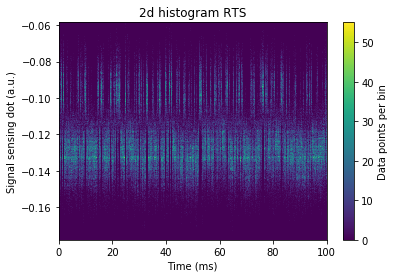

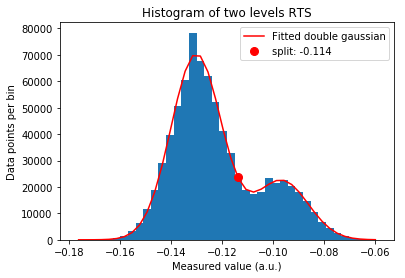

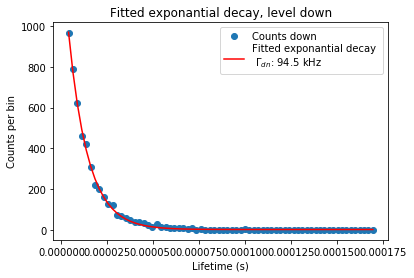

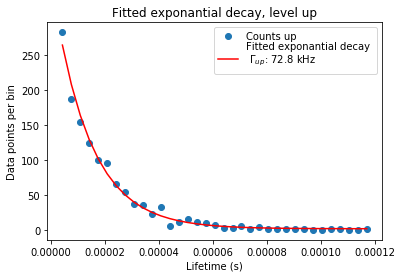

In [3]:
tunnelrates_RTS(rtsdata, samplerate=samplerate, min_sep = 1.0, min_duration = 20, num_bins = 40, plungers=[], fig=1, verbose=1)